# MNIST classification

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

## 1- Data Preparation

In [18]:
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

### 1-1. Data Inspection

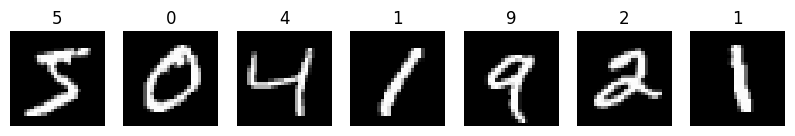

In [24]:
# Visualize data
fig, axes = plt.subplots(1,7, figsize=(10,5))
for i, ax in enumerate(axes):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_axis_off()
    ax.set_title(y_train[i])

In [29]:
# Data properties
print(type(x_train))
print(x_train.shape)
print(x_train.ndim) # rank
print(x_train.dtype)

<class 'numpy.ndarray'>
(60000, 28, 28)
3
uint8


### 1-2. Pre-processing

In [39]:
# Reshape
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [6]:
# Normalization
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32')  / 255

## 3- Model Design

In [8]:
model = Sequential(
    [
        layers.Dense(100, activation='relu', input_dim=784),
        layers.Dense(10, activation='softmax')
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 4- Training

In [11]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [14]:
model.fit(x_train, y_train,
          epochs=10,
          batch_size=256)

Epoch 1/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0518 - accuracy: 0.9851
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0457 - accuracy: 0.9879
Epoch 3/10
235/235 [==============================] - 3s 11ms/step - loss: 0.0416 - accuracy: 0.9888
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0373 - accuracy: 0.9902
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0334 - accuracy: 0.9913
Epoch 6/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0300 - accuracy: 0.9926
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0271 - accuracy: 0.9931
Epoch 8/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0241 - accuracy: 0.9943
Epoch 9/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0214 - accuracy: 0.9955
Epoch 10/10
235/235 [==============================] - 2s 9ms/step - loss: 0.0188 - accuracy: 0.996

## 5- Evaluation

In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0865 - accuracy: 0.9730


[0.08648611605167389, 0.9729999899864197]